# Gene Annotation

Mapping of the relevant CpGs identified by clustering and the associated genes.
The CpGs can be found in folder 'Mammal_Methylation_Levels/Cluster Analysis/Relevant CpGS'. There will be at least 3 files, each with the relevant CpGs of each of the 3 Clocks. 

In [1]:
### Libraries

import os

from Bio import Entrez, SeqIO
from Bio.SeqFeature import SeqFeature, FeatureLocation
from Bio.SeqRecord import SeqRecord

import pandas as pd

import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pandas as pd


In [17]:
# Load the complete dataset 

cpgs_full = pd.read_csv("../../Mammal_Methylation_Levels/GSE223748_datBetaNormalized.csv", usecols =["Unnamed: 0"], index_col=False)

In [18]:
cpgs_full = cpgs_full.rename(columns={"Unnamed: 0": "CpG"})
cpgs_full

CpG
0                  cg00000165
1                  cg00001209
2                  cg00001364
3                  cg00001582
4                  cg00002920
...                       ...
37549  rs9363764_II_F_C_37541
37550   rs939290_II_F_C_37535
37551    rs951295_I_F_C_37507
37552   rs966367_II_F_C_37551
37553  rs9839873_II_F_C_37532

[37554 rows x 1 columns]

In [2]:
# ### Load the Clocks metadata
# # this was needed because ENTREZID was needed for downstream analysis

# # Original file names
# ori_clock_name = ['clock_1_ordered.csv', 'clock_2_ordered.csv', 'clock_3_ordered.csv', 'overlap_2_3_ordered.csv']

# # Mapping of original file names to desired clock names
# clock_name_mapping = {
#     'clock_1_ordered.csv': 'clock1',
#     'clock_2_ordered.csv': 'clock2',
#     'clock_3_ordered.csv': 'clock3',
#     'overlap_2_3_ordered.csv': 'clock2_3'
# }

# ori_clocks = {}

# # Load the CSV files into the dictionary with the desired names
# for clock_name in ori_clock_name:
#     new_name = clock_name_mapping[clock_name]
#     df = pd.read_csv(f'../../FunctionalAnalysis/{clock_name}')
#     df.rename(columns={'var': 'CpG'}, inplace=True)  # Rename 'var' column to 'CpG'

#     # For clock2_3, rename 'var_x' to 'CpG' and 'ENTREZID_x' to 'ENTREZID'
#     if new_name == 'clock2_3':
#         df.rename(columns={'var_x': 'CpG', 'ENTREZID_x': 'ENTREZID'}, inplace=True)
    
#     ori_clocks[new_name] = df

In [24]:
### Load metadata file

full_metadata = pd.read_csv("../../Mammal_Methylation_Levels/GSE223748_complete_metadata.csv")

In [25]:
full_metadata

SpeciesCommonName      SpeciesLatinName  Tissue     Sex      Age  \
0          Olive baboon       Papio hamadryas  Cortex  Female  22.1200   
1          Olive baboon       Papio hamadryas  Cortex    Male   8.0400   
2          Olive baboon       Papio hamadryas  Cortex  Female  18.9500   
3          Olive baboon       Papio hamadryas  Cortex    Male  18.6400   
4          Olive baboon       Papio hamadryas  Cortex  Female  18.6100   
...                 ...                   ...     ...     ...      ...   
15038      Prairie vole  Microtus ochrogaster   Liver    Male   0.8493   
15039      Prairie vole  Microtus ochrogaster   Liver  Female   0.7890   
15040      Prairie vole  Microtus ochrogaster   Liver    Male   0.3644   
15041      Prairie vole  Microtus ochrogaster     Ear    Male   0.8740   
15042      Prairie vole  Microtus ochrogaster   Liver  Female   0.5808   

                     Sample      GEO_ID  
0      X202794570001_R01C01  GSM6981727  
1      X202794570001_R01C02  GSM6981733  
2      X202794570001_R02C01  GSM6981728  
3      X202794570001_R02C02  GSM6981734  
4      X202794570001_R03C01  GSM6981729  
...                     ...         ...  
15038  X204529320081_R02C02  GSM6989927  
15039  X204529320081_R03C01  GSM6989922  
15040  X204529320081_R04C01  GSM6989923  
15041  X204529320081_R04C02  GSM6989929  
15042  X204529320081_R05C01  GSM6989924  

[15043 rows x 7 columns]

In [19]:
### Load the HorvathMammalMethylChip40 annotation file

annotation_file = "HorvathMammalMethylChip40.csv"
annotations = pd.read_csv(annotation_file, index_col=0, low_memory=False)
annotations.head()

IlmnID                         Name AddressA_ID  \
1  cg00000165  cg00000165_B_C_II_16W28R4_Y    61688267   
2  cg00001209    cg00001209_B_C_II_15M34_Y    99653471   
3  cg00001364    cg00001364_B_C_II_28Y21_Y    94653210   
4  cg00001582    cg00001582_B_C_II_17M32_Y    88781221   
5  cg00002920  cg00002920_B_C_II_M40Y5Y2_Y    03643387   

                                    AlleleA_ProbeSeq ProbeA_Ref_CIGAR  \
1  CAAAATCTATTAATACWATAACTTTTAATAAAACAACTAAAACACR...          16W28R4   
2  TCTTAACATTATAAAMAAAACAAAATAATACAAAATATATTCAACC...            15M34   
3  ACCAATTTAATATAAATCRCTTATATAAYAAACACCTAAAAACAAA...            28Y21   
4  AACCCTTTAAAAATAAAMTAACCAATATAATCTAACACTTCAACTT...            17M32   
5  MCATAATTTATTTTCTTAAAATATTAATTTATCAACAACTTYCCTA...          M40Y5Y2   

   AddressB_ID AlleleB_ProbeSeq ProbeB_Ref_CIGAR StrandFR StrandTB  ...  \
1          NaN              NaN              NaN        R        B  ...   
2          NaN              NaN              NaN        F        B  ...   
3          NaN              NaN              NaN        R        B  ...   
4          NaN              NaN              NaN        R        B  ...   
5          NaN              NaN              NaN        R        B  ...   

  Elephant.loxAfr3.100_CGstart Elephant.loxAfr3.100_CGend  \
1                   11412983.0                 11412984.0   
2                   64819638.0                 64819639.0   
3                    1266053.0                  1266054.0   
4                          NaN                        NaN   
5                          NaN                        NaN   

  Elephant.loxAfr3.100_seqnames Elephant.loxAfr3.100_SYMBOL  \
1                   scaffold_60                      BARHL2   
2                    scaffold_7                       KIF2A   
3                   scaffold_74                       PROX1   
4                           NaN                         NaN   
5                           NaN                         NaN   

  Elephant.loxAfr3.100_main_Categories Cattle.ARS-UCD1.2_CGstart  \
1                  Intergenic_upstream                52520158.0   
2                  Intergenic_upstream                17450440.0   
3                                 Exon                69576644.0   
4                                  NaN                34702943.0   
5                                  NaN                47915351.0   

  Cattle.ARS-UCD1.2_CGend Cattle.ARS-UCD1.2_seqnames Cattle.ARS-UCD1.2_SYMBOL  \
1              52520159.0                          3                   BARHL2   
2              17450441.0                         20                    KIF2A   
3              69576645.0                         16                    PROX1   
4              34702944.0                         28                    ZMIZ1   
5              47915352.0                         26                    MKI67   

  Cattle.ARS-UCD1.2_main_Categories  
1               Intergenic_upstream  
2               Intergenic_upstream  
3                              Exon  
4               Intergenic_upstream  
5               Intergenic_upstream  

[5 rows x 81 columns]

In [20]:
### Display all column names to see what we have
print(annotations.columns)

Index(['IlmnID', 'Name', 'AddressA_ID', 'AlleleA_ProbeSeq', 'ProbeA_Ref_CIGAR',
       'AddressB_ID', 'AlleleB_ProbeSeq', 'ProbeB_Ref_CIGAR', 'StrandFR',
       'StrandTB', 'StrandCO', 'Design_Sequence', 'Forward_Sequence',
       'Top_Sequence', 'SourceSeq', 'Infinium_Design_Type', 'Next_Base',
       'Color_Channel', 'Next_Base_Alt', 'Color_Channel_Alt', 'CG.',
       'SNP_Count', 'CPG_Count', 'Replicate_Number', 'Replicate_Count',
       'IlmnID_Old', 'Human.Hg19_CGstart', 'Human.Hg19_CGend',
       'Human.Hg19_seqnames', 'Human.Hg19_SYMBOL',
       'Human.Hg19_main_Categories', 'Human.Hg38_start', 'Human.Hg38_end',
       'Human.Hg38_seqnames', 'Human.Hg38_SYMBOL',
       'Human.Hg38_main_Categories', 'Mouse.GRCm38.100_CGstart',
       'Mouse.GRCm38.100_CGend', 'Mouse.GRCm38.100_seqnames',
       'Mouse.GRCm38.100_SYMBOL', 'Mouse.GRCm38.100_main_Categories',
       'Rat.Rnor.6.0.101_CGstart', 'Rat.Rnor.6.0.101_CGend',
       'Rat.Rnor.6.0.101_seqnames', 'Rat.Rnor.6.0.101_SYMBOL',
 

The annotations csv contains the gene annotations for all the species used in the analysis. For now, we will focus on human CpGs and genes.

In [21]:
### Selecting relevant human annotation columns

annotation_cols = [
    'IlmnID', 
    'Human.Hg38_seqnames', 
    'Human.Hg38_start', 
    'Human.Hg38_end', 
    'Human.Hg38_SYMBOL', 
    'Human.Hg38_main_Categories'
]

# Filter the annotation DataFrame to include only the necessary columns
filtered_annotations = annotations.copy()[annotation_cols]
filtered_annotations.head()

# Rename columns for easier understanding and to match desired output
filtered_annotations.rename(columns={
    'IlmnID': 'CpG',
    'Human.Hg38_seqnames': 'chr',
    'Human.Hg38_start': 'start',
    'Human.Hg38_end': 'end',
    'Human.Hg38_SYMBOL': 'gene',
    'Human.Hg38_main_Categories': 'category'
}, inplace=True)
filtered_annotations.head()

# Merge CpG names with annotations to get genomic coordinates and gene information
cpgs_full = cpgs_full.merge(filtered_annotations, on='CpG', how='left')

In [22]:
cpgs_full

CpG    chr        start          end          gene  \
0                  cg00000165   chr1   90729117.0   90729118.0        BARHL2   
1                  cg00001209   chr5   61924202.0   61924203.0   C5orf64-AS1   
2                  cg00001364   chr1  213997033.0  213997034.0         PROX1   
3                  cg00001582  chr10   79068945.0   79068946.0         ZMIZ1   
4                  cg00002920  chr10  128538210.0  128538211.0     LINC01163   
...                       ...    ...          ...          ...           ...   
37549  rs9363764_II_F_C_37541   chr6   67522149.0   67522150.0  LOC102723883   
37550   rs939290_II_F_C_37535   chr3   14617358.0   14617359.0       CCDC174   
37551    rs951295_I_F_C_37507    NaN          NaN          NaN           NaN   
37552   rs966367_II_F_C_37551   chr2   12008093.0   12008094.0     MIR3681HG   
37553  rs9839873_II_F_C_37532   chr3   86613004.0   86613005.0     LINC02070   

                    category  
0        Intergenic_upstream  
1                     Intron  
2                       Exon  
3                   Promoter  
4      Intergenic_downstream  
...                      ...  
37549    Intergenic_upstream  
37550                 Intron  
37551                    NaN  
37552                 Intron  
37553  Intergenic_downstream  

[37554 rows x 6 columns]

In [23]:
### Function to determine region type

def determine_region_type(category):
    
    if pd.isna(category):
        return 'intergenic'
    
    category = category.lower()  # Convert to lowercase for case-insensitive matching
    
    if 'promoter' in category:
        return 'promoter'
    
    elif any(term in category for term in ['exon', 'intron', 'utr']): # Because some categories contain 'exon', 'intron', 'utr'
        return 'gene body'
    
    elif 'intergenic' in category:
        return 'intergenic'
    
    else:
        return 'other'  # For any unforeseen categories

In [26]:
### Annotation

# Determine the region type for each CpG and add it to the DataFrame
cpgs_full['region'] = cpgs_full['category'].apply(determine_region_type)

# Save the annotated DataFrame to a CSV file
output_path = f'../../FunctionalAnalysis/Annotations/Annotations Results/Complete Methylation Dataset/complete_methylation_dataset_annotated_CpGs.csv'
os.makedirs(os.path.dirname(output_path), exist_ok=True)
cpgs_full.to_csv(output_path, index=False)

In [27]:
cpgs_full

CpG    chr        start          end          gene  \
0                  cg00000165   chr1   90729117.0   90729118.0        BARHL2   
1                  cg00001209   chr5   61924202.0   61924203.0   C5orf64-AS1   
2                  cg00001364   chr1  213997033.0  213997034.0         PROX1   
3                  cg00001582  chr10   79068945.0   79068946.0         ZMIZ1   
4                  cg00002920  chr10  128538210.0  128538211.0     LINC01163   
...                       ...    ...          ...          ...           ...   
37549  rs9363764_II_F_C_37541   chr6   67522149.0   67522150.0  LOC102723883   
37550   rs939290_II_F_C_37535   chr3   14617358.0   14617359.0       CCDC174   
37551    rs951295_I_F_C_37507    NaN          NaN          NaN           NaN   
37552   rs966367_II_F_C_37551   chr2   12008093.0   12008094.0     MIR3681HG   
37553  rs9839873_II_F_C_37532   chr3   86613004.0   86613005.0     LINC02070   

                    category      region  
0        Intergenic_upstream  intergenic  
1                     Intron   gene body  
2                       Exon   gene body  
3                   Promoter    promoter  
4      Intergenic_downstream  intergenic  
...                      ...         ...  
37549    Intergenic_upstream  intergenic  
37550                 Intron   gene body  
37551                    NaN  intergenic  
37552                 Intron   gene body  
37553  Intergenic_downstream  intergenic  

[37554 rows x 7 columns]

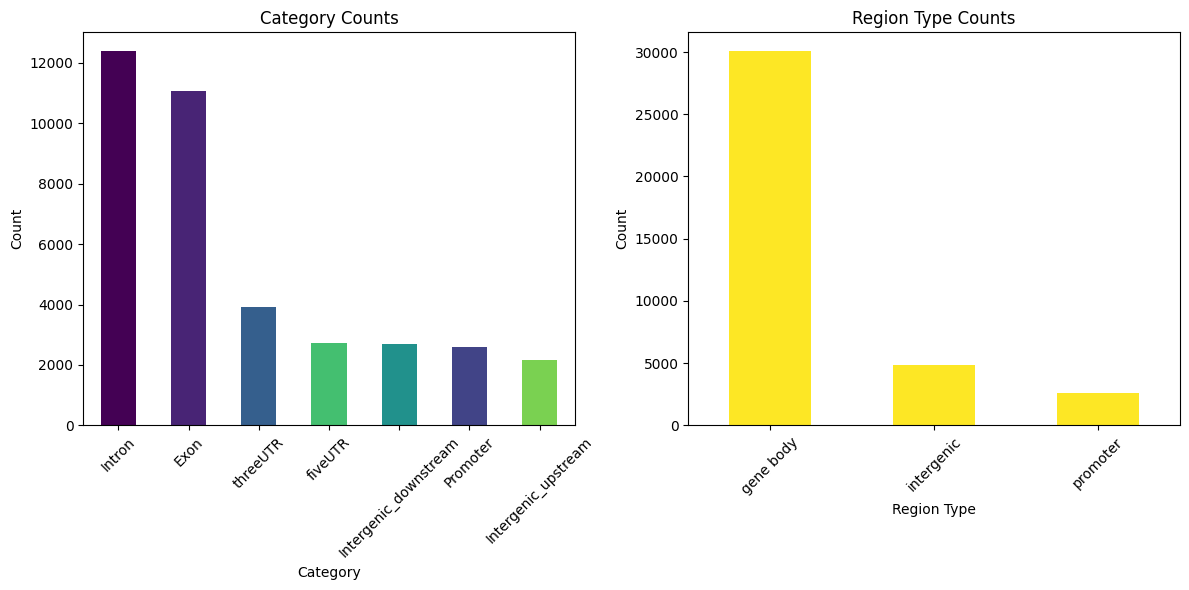

In [28]:
### Plotting - Bar Plots for Category and Region Type Counts - Loop

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Viridis color palette
viridis_colors = plt.cm.viridis([0, 0.1, 0.2, 0.3, 0.5, 0.7, 0.8, 1.0])

# Map the categories to the Viridis colors
color_map = {
    'Exon': mcolors.to_hex(viridis_colors[1]),
    'Intron': mcolors.to_hex(viridis_colors[0]),
    'Promoter': mcolors.to_hex(viridis_colors[2]),
    'threeUTR': mcolors.to_hex(viridis_colors[3]),
    'fiveUTR': mcolors.to_hex(viridis_colors[5]),
    'Intergenic_downstream': mcolors.to_hex(viridis_colors[4]),
    'Intergenic_upstream': mcolors.to_hex(viridis_colors[6])
}

# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Plot category counts with predefined colors
category_counts = cpgs_full['category'].value_counts()
category_colors = [color_map.get(cat, mcolors.to_hex(viridis_colors[7])) for cat in category_counts.index]
category_counts.plot(kind='bar', ax=ax[0], color=category_colors)
ax[0].set_title('Category Counts')
ax[0].set_xlabel('Category')
ax[0].set_ylabel('Count')
ax[0].tick_params(axis='x', rotation=45)

# Plot region type counts with Viridis colors
region_type_counts = cpgs_full['region'].value_counts()
region_type_counts.plot(kind='bar', ax=ax[1], color=viridis_colors[7])
ax[1].set_title('Region Type Counts')
ax[1].set_xlabel('Region Type')
ax[1].set_ylabel('Count')
ax[1].tick_params(axis='x', rotation=45)

# Adjust layout and display
plt.tight_layout()

# Save the plot
plt.savefig('../../FunctionalAnalysis/Annotations/Annotations Results/Complete Methylation Dataset/cpgs_full_category_region_counts.png')

# Show the plot
plt.show()


In [32]:
### Chromosome-wise visualization of the gene annotations of the relevant CpGs in Clock1


# Function to sort chromosomes
def chromosome_sort_key(x):
    if isinstance(x, float):
        return 26  # Place float values at the end
    x = str(x).replace('chr', '')
    if x.isdigit():
        return int(x)
    elif x == 'X':
        return 23
    elif x == 'Y':
        return 24
    else:
        return 25  # for any other non-standard chromosomes


# Chromosome sizes for the hg38 genome
chromosome_sizes = {
    'chr1': 248956422,
    'chr2': 242193529,
    'chr3': 198295559,
    'chr4': 190214555,
    'chr5': 181538259,
    'chr6': 170805979,
    'chr7': 159345973,
    'chr8': 145138636,
    'chr9': 138394717,
    'chr10': 133797422,
    'chr11': 135086622,
    'chr12': 133275309,
    'chr13': 114364328,
    'chr14': 107043718,
    'chr15': 101991189,
    'chr16': 90338345,
    'chr17': 83257441,
    'chr18': 80373285,
    'chr19': 58617616,
    'chr20': 64444167,
    'chr21': 46709983,
    'chr22': 50818468,
    'chrX': 156040895,
    'chrY': 57227415
}

# Viridis color palette
viridis_colors = plt.cm.viridis([0, 0.1, 0.2, 0.3, 0.5, 0.7, 0.8, 1.0])

# Map the categories to the Viridis colors
color_map = {
    'Intron': mcolors.to_hex(viridis_colors[0]), 
    'Exon': mcolors.to_hex(viridis_colors[2]), 
    'Promoter': mcolors.to_hex(viridis_colors[3]), 
    'threeUTR': mcolors.to_hex(viridis_colors[4]), 
    'Intergenic_downstream': mcolors.to_hex(viridis_colors[5]), 
    'fiveUTR': mcolors.to_hex(viridis_colors[6]), 
    'Intergenic_upstream': mcolors.to_hex(viridis_colors[7]) 
}



# Clean the 'chr' column
cpgs_full['chr'] = cpgs_full['chr'].dropna().astype(str)


# Get unique chromosomes and sort them
chromosomes = sorted(cpgs_full['chr'].unique(), key=chromosome_sort_key)

# Create subplots
fig = make_subplots(rows=len(chromosomes), cols=1, 
                    shared_xaxes=False, vertical_spacing=0.02,
                    subplot_titles=chromosomes)

# Add traces for each chromosome
for i, chr in enumerate(chromosomes, start=1):
    chr_cpg_annotations = cpgs_full[cpgs_full['chr'] == chr]

    # Add gene annotations
    fig.add_trace(
        go.Scatter(
            x=chr_cpg_annotations['start'],
            y=[i]*len(chr_cpg_annotations),
            mode='markers+text',
            marker=dict(
                size=10,
                color=[color_map.get(cat, mcolors.to_hex(viridis_colors[1])) for cat in chr_cpg_annotations['category']],
                symbol='square', 
                line=dict(width=0.5, color='black')
            ),
            text=chr_cpg_annotations['gene'],
            textposition='top center',        
            textfont=dict(color='black', size=10),
            hoverinfo='text',
            hovertext=[f"{cpg}<br>{gene}<br>{cat}<br>{start}" 
                       for cpg, gene, cat, start in zip(chr_cpg_annotations['CpG'], chr_cpg_annotations['gene'], 
                                                        chr_cpg_annotations['category'], chr_cpg_annotations['start'])],
            showlegend=False
        ),
        row=i, col=1
    )

    # Set the x-axis range to the actual size of the chromosome
    fig.update_xaxes(title_text=f'Genomic Position of {chr}', showgrid=False, row=i, col=1, range=[0, chromosome_sizes.get(chr, 1)])

# Add legend entries
for category, color in color_map.items():
    fig.add_trace(
        go.Scatter(
            x=[None], y=[None],
            mode='markers',
            marker=dict(size=10, color=color, symbol='square'),
            legendgroup=category,
            showlegend=True,
            name=category
        )
    )

# Update layout
fig.update_layout(
    height=100*len(chromosomes),
    width=1200,
    showlegend=True,
    title='Gene Annotation Visualization of CpGs',
    hovermode='closest'
)

# Update y-axes
fig.update_yaxes(showticklabels=False, showgrid=False)

# Ensure the output directory exists
output_dir = '../../FunctionalAnalysis/Annotations/Annotations Results/Complete Methylation Dataset'
os.makedirs(output_dir, exist_ok=True)

# Save the plot 
output_path = os.path.join(output_dir, 'cpgs_full_gene_annotation_chromosome_view.html')
fig.write_html(output_path)

# Show the plot
fig.show()
